In [502]:
from importlib import reload
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Add the project root to the path
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, project_root)

import pacing_auction.data as data
import pacing_auction.auction as auction
import pacing_auction.elimination as elimination
import pacing_auction.generator as generator
reload(data)
reload(elimination)
reload(auction)
reload(generator)

sns.set_theme("paper")

In [499]:
def print_result(sim: auction.Auction, res: auction.BRDResult):
    print(f"Result:             {type(res)}")
    print(f"Iterations:         {res.iteration}")
    print(f"Time per Iteration: {1000 * round(res.stats["time"] / res.iteration, 4)}ms")
    print(f"Time:               {res.stats['time']:.2f}s")
    if "cycle_length" in res.stats:
        print(f"Cycle length      : {res.stats["cycle_length"]}")
    print(f"Seed:               {sim.seed}")

a.b=array([0.2, 0.4])
Result:             <class 'pacing_auction.data.PNE'>
Iterations:         1
Time per Iteration: 1.7ms
Time:               0.00s
Cycle length      : 0
Seed:               3626709124
[[0.  0.5]
 [1.  0.5]]
[0.25 0.  ]
[0.16666667 0.125     ]
[1000 1000]


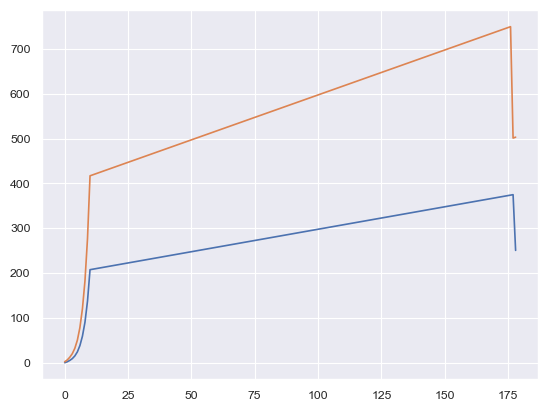

Result:             <class 'pacing_auction.data.Cycle'>
Iterations:         179
Time per Iteration: 0.3ms
Time:               0.05s
Cycle length      : 125
Seed:               3626709124


In [505]:
n, m, q = 2, 2, 1000

a = auction.Auction(n, m, q)

a.v = [
    [1/2, 1/3],
    [1/4, 1/4],
]
a.b = [0.2, 0.4]
print(f"{a.b=}")

# Try start from high values
a.alpha_q = [q, q]
res = a.responses()
print_result(a, res)
if isinstance(res, data.PNE):
    print(res.x)
    print(res.p)
    print(a.utility(res.x, res.p))
    print(a.alpha_q)

a.alpha_q = np.array([1, 1])
res = a.responses()

utils = res.stats["alpha_q"][0]
sns.lineplot(x=range(len(utils)), y=utils)
utils = res.stats["alpha_q"][1]
sns.lineplot(x=range(len(utils)), y=utils)
plt.show()

if isinstance(res, data.PNE):
    print(res.x)
    print(res.p)
    print(a.utility(res.x, res.p))
    print(a.alpha_q)
print_result(a, res)

In [474]:
n, m, q = 5, 5, 10000

pnes = []
cycles = []

for i in range(100):
    sim = auction.Auction(n, m, q, generator=generator.SampledAuctionGenerator())
    res = sim.responses()
    if i % 50 == 0:
        print(f"Completed {i} simulations")
    # print_result(sim, res)
    if isinstance(res, data.Cycle):
        cycles.append(res)
    else:
        pnes.append(res)

print(len(pnes) / (len(pnes) + len(cycles)))

Completed 0 simulations


KeyboardInterrupt: 

In [475]:

print(len(pnes) / (len(pnes) + len(cycles)))

0.0


In [371]:
def get_pne(*args):
    sim = auction.Auction(*args)
    res = sim.responses()
    while isinstance(res, auction.Cycle):
        sim = auction.Auction(*args)
        res = sim.responses()

    return sim, res  # type: ignore

In [ ]:
n, m, q = 10, 10, 1000

# sim = auction.Auction(n, m, no_budget=True)

res = sim.responses()
sim, res = get_pne(n, m, q)

print_result(sim, res)

In [ ]:
bidder = 0

In [ ]:
data = res.stats["d_utility"]
sns.histplot(data[bidder], bins=30)
plt.show()

bidder = (bidder + 1)

/var/folders/hl/hnpfdrvx5s3_6xcgkx2nt17h0000gn/T/ipykernel_75845/1845252451.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=groups, y=values, hue=rows, hue_order=hue_order, palette=palette, ci=None)


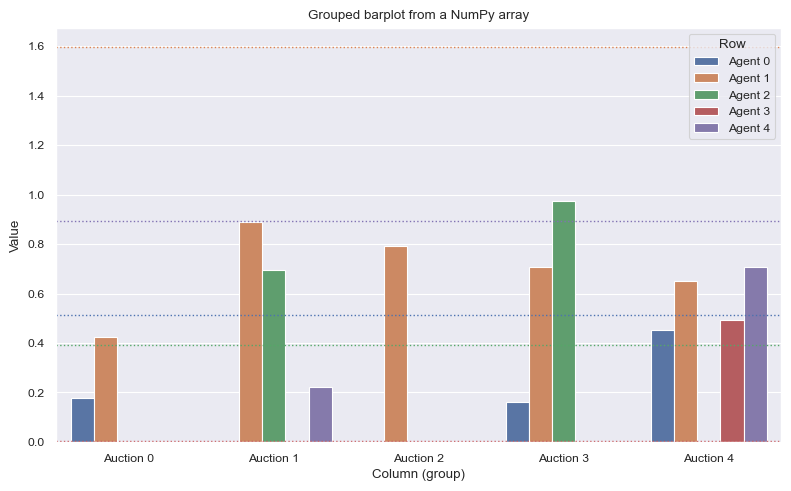

In [214]:
# Bar graph
values = sim.v.flatten(order='F')
groups = np.repeat([f"Auction {j}" for j in range(m)], n)
rows   = np.tile([f"Agent {i}" for i in range(n)], m)
hue_order = [f"Agent {i}" for i in range(n)]
palette = sns.color_palette("deep", n_colors=n)
values = sim.v.flatten(order='F')
groups = np.repeat([f"Auction {j}" for j in range(m)], n)
rows   = np.tile([f"Agent {i}" for i in range(n)], m)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=groups, y=values, hue=rows, hue_order=hue_order, palette=palette, ci=None)
plt.xlabel("Column (group)")
plt.ylabel("Value")
plt.title("Grouped barplot from a NumPy array")
plt.legend(title="Row")
plt.tight_layout()
for i in range(n):
    plt.axhline(y=sim.b[i], color=palette[i], linestyle='dotted', linewidth=1)
plt.show()

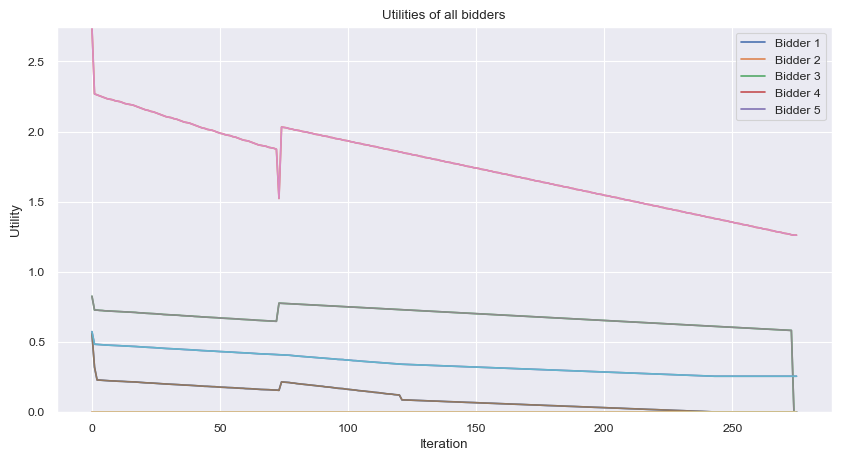

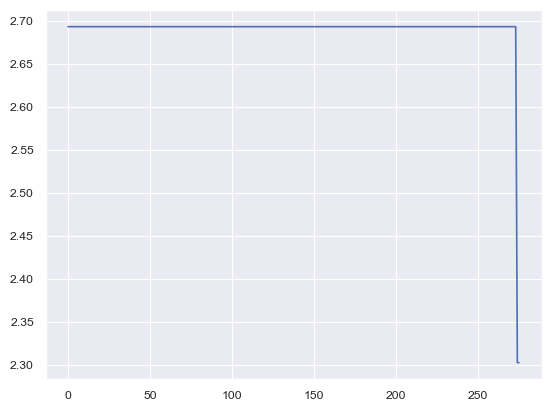

In [215]:
data = res.stats["utility"]

# Create separate figure for combined plot
plt.figure(figsize=(10, 5))
for i in range(n):
    sns.lineplot(data=data[i], label=f'Bidder {i+1}')
plt.title("Utilities of all bidders")
plt.xlabel("Iteration")
plt.ylabel("Utility")
plt.ylim(0, np.max(data))

# plt.savefig("/Users/khalid/Desktop/honours-project-writeup/figures/utilities.png", dpi=500, bbox_inches="tight")

max_util = np.max(data)
for i in range(sim.n):
    sns.lineplot(data=data[i])

plt.figure()
sns.lineplot(data=res.stats["liquid_welfare"])

plt.show()